<a href="https://colab.research.google.com/github/oyoungsun/OCRproject/blob/main/compare_Tesseract_vs_Easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pytesseract
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 13.6 MB/s eta 0:00:00


In [8]:
!sudo apt install libtesseract-dev
!sudo apt install tesseract-ocr
#한국어 검출 lib
!sudo apt-get install tesseract-ocr-kor

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
tesseract-ocr set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-kor is already the newest version (1:4.00~git30-7274cfa-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


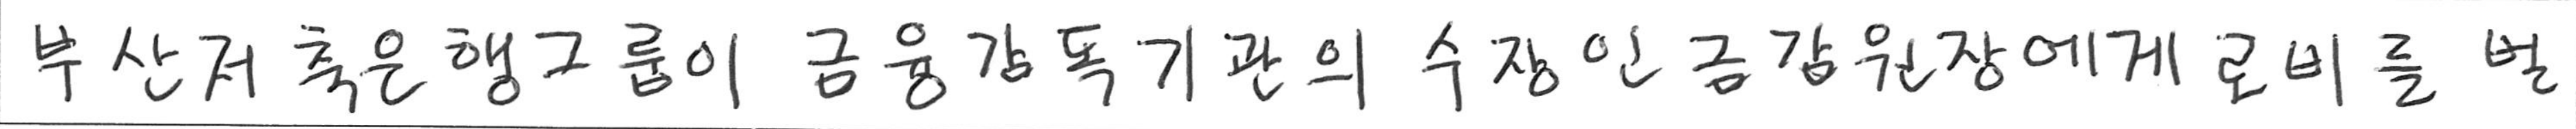

부산거 측은햄그큼이 금융#똑기관의 42 증갱원잠에게교비를 벗



In [12]:
### tesseract ###
import os
from PIL import Image
from google.colab.patches import cv2_imshow
from pytesseract import Output
import pytesseract
import argparse
import imutils
import cv2

path = '/content/drive/MyDrive/Colab Notebooks/New_sample/원천데이터/01_handwriting_sentence_images/1_sentence/00000019.png'
img = cv2.imread(path)
cv2_imshow(image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# pytesseract_to_string 함수로 텍스트 추출
custom_config = r'--psm 4'
print(pytesseract.image_to_string(img, config=custom_config, lang='kor'))


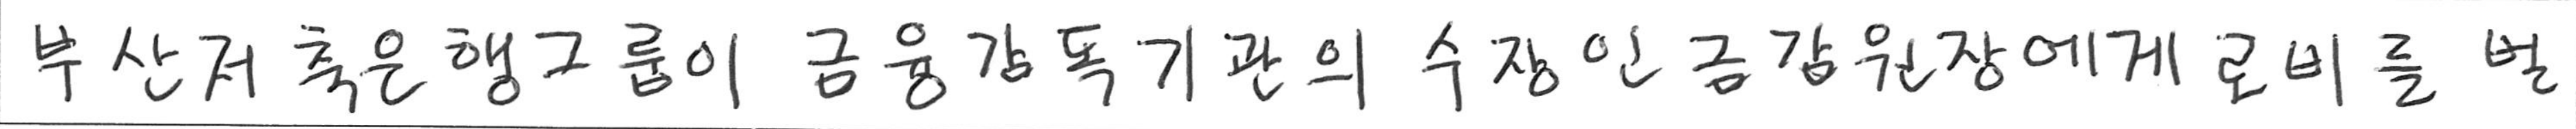

[INFO] OCR'ing input image...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

['부 산거 축운 행그 품이', '금웅 7 독기관의 수장인 금 감 원 장에제 로비틀 벌']

In [13]:
###easy OCR
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import imutils
from easyocr import Reader
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image

from google.colab.patches import cv2_imshow

path = '/content/drive/MyDrive/Colab Notebooks/New_sample/원천데이터/01_handwriting_sentence_images/1_sentence/00000019.png'

image = cv2.imread(path, cv2.IMREAD_COLOR)
path = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image) # 이미지를 보여주는 코드로 생략가능

langs = ['ko', 'en']

print("[INFO] OCR'ing input image...")
reader = Reader(lang_list=langs, gpu=True)
results = reader.readtext(image)

simple_results = reader.readtext(image, detail = 0)
simple_results #인식된 글자만 추출